In [20]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import pandas as pd

print (tf.__version__) # 1.12.0

2.12.0


### Loading the fashion MNIST data 

In [21]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_data = fashion_mnist.load_data()[0]
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Exploring and Visualizing the data

In [22]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


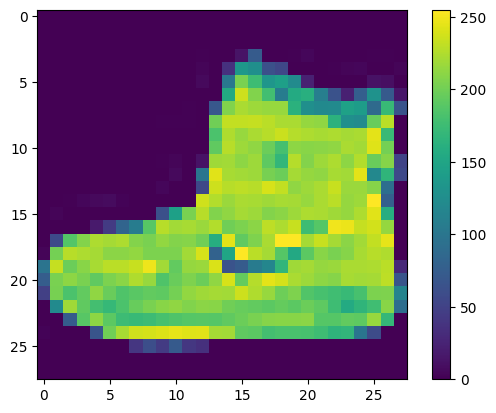

In [23]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Train classes distribution

In [24]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = train_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(train_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(train_images, train_labels)

T-shirt/top         :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Ankle boot          :   6000 or 10.0%


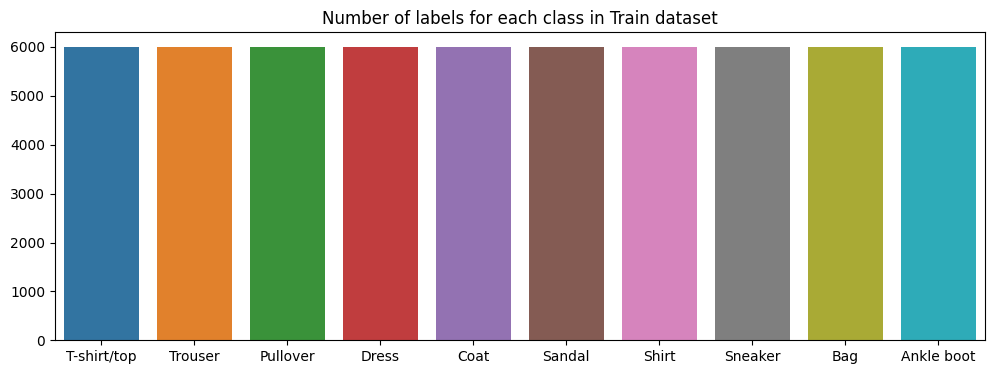

In [25]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Train dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

Test classes distribution

In [26]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = test_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(test_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(test_images, test_labels)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Ankle boot          :   1000 or 10.0%


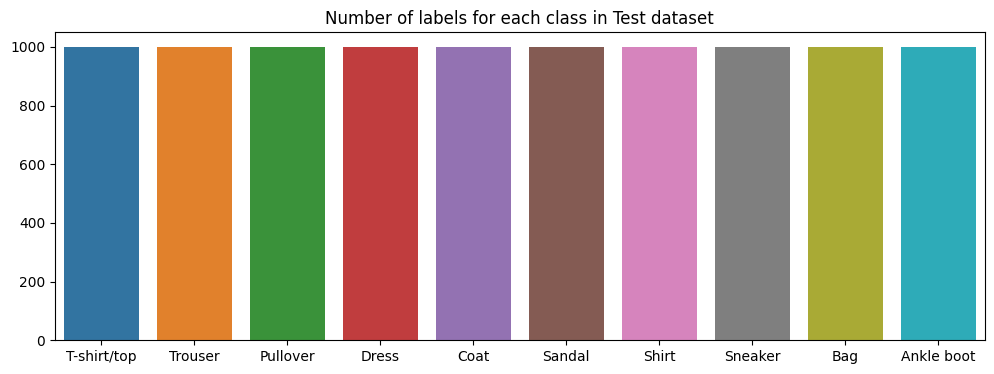

In [27]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Test dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

### Normalizing the data 

In [28]:
# scale the values to a range of 0 to 1 of both data sets
#train_images = train_images / 255.0
#test_images = test_images / 255.0

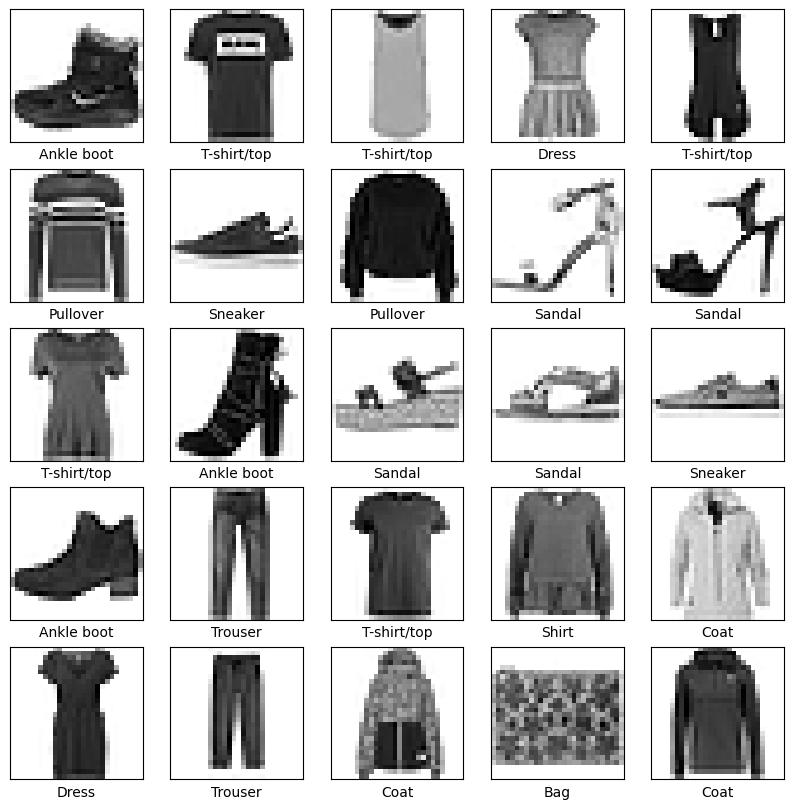

In [29]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
	

In [30]:
# Model CNN
model_CNN = Sequential()

# Add convolution 2D
model_CNN.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model_CNN.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model_CNN.add(Dropout(0.4))
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
# Add dropouts to the model
model_CNN.add(Dropout(0.3))
model_CNN.add(Dense(10, activation='softmax'))


model_CNN.summary() 


model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

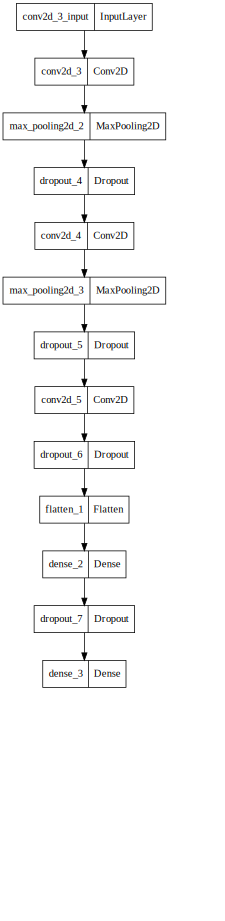

In [31]:
plot_model(model_CNN, to_file='model.png')
SVG(model_to_dot(model_CNN).create(prog='dot', format='svg'))

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
train_labels.shape

(60000,)

In [34]:
def data_preprocessing(images, labels):
    out_y = to_categorical(labels, 10)
    num_images = images.shape[0]
    x_shaped_array = images.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [35]:
# prepare the data
train_images, train_labels = data_preprocessing(train_images, train_labels)
test_images, test_labels = data_preprocessing(test_images, test_labels)

In [36]:
# History
history_CNN=model_CNN.fit(train_images, train_labels, epochs=50, batch_size=128, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)


Epoch 1/50
375/375 [==============================] - 63s 166ms/step - loss: 0.7372 - accuracy: 0.7250 - val_loss: 0.4625 - val_accuracy: 0.8283
Epoch 2/50
375/375 [==============================] - 55s 148ms/step - loss: 0.4675 - accuracy: 0.8286 - val_loss: 0.3679 - val_accuracy: 0.8655
Epoch 3/50
375/375 [==============================] - 55s 148ms/step - loss: 0.4042 - accuracy: 0.8534 - val_loss: 0.3169 - val_accuracy: 0.8827
Epoch 4/50
375/375 [==============================] - 58s 154ms/step - loss: 0.3637 - accuracy: 0.8681 - val_loss: 0.3020 - val_accuracy: 0.8864
Epoch 5/50
375/375 [==============================] - 58s 154ms/step - loss: 0.3378 - accuracy: 0.8766 - val_loss: 0.2965 - val_accuracy: 0.8904
Epoch 6/50
375/375 [==============================] - 57s 153ms/step - loss: 0.3231 - accuracy: 0.8814 - val_loss: 0.2720 - val_accuracy: 0.8994
Epoch 7/50
375/375 [==============================] - 58s 154ms/step - loss: 0.3042 - accuracy: 0.8882 - val_loss: 0.2702 - val_ac

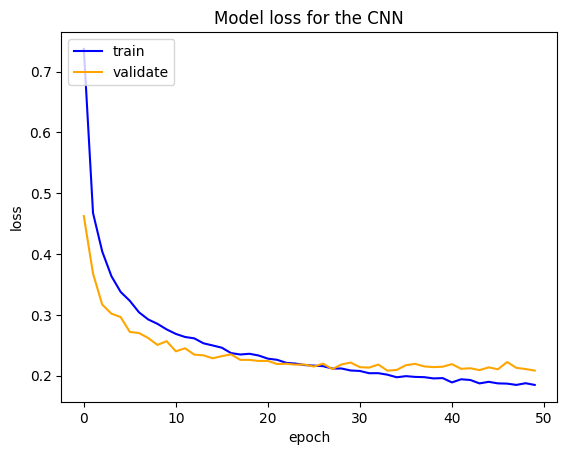

In [37]:
#Plot loss results for training data and testing data
plt.plot(history_CNN.history['loss'], 'blue')
plt.plot(history_CNN.history['val_loss'], 'orange')
plt.title('Model loss for the CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


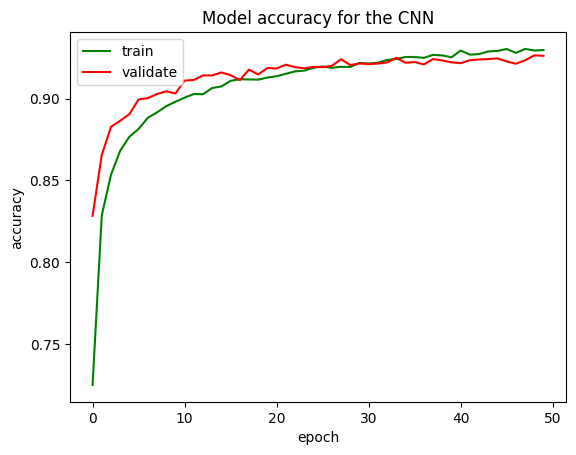

In [38]:
#Plot accuracy results for training data and testing data 
plt.plot(history_CNN.history['accuracy'], 'green')
plt.plot(history_CNN.history['val_accuracy'], 'red')
plt.title('Model accuracy for the CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [55]:
predictions = model_CNN.predict(test_images)

313/313 [==============================] - 7s 21ms/step


In [56]:
predictions.shape

(10000, 10)

In [57]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<ipython-input-58-9627525e8db4>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


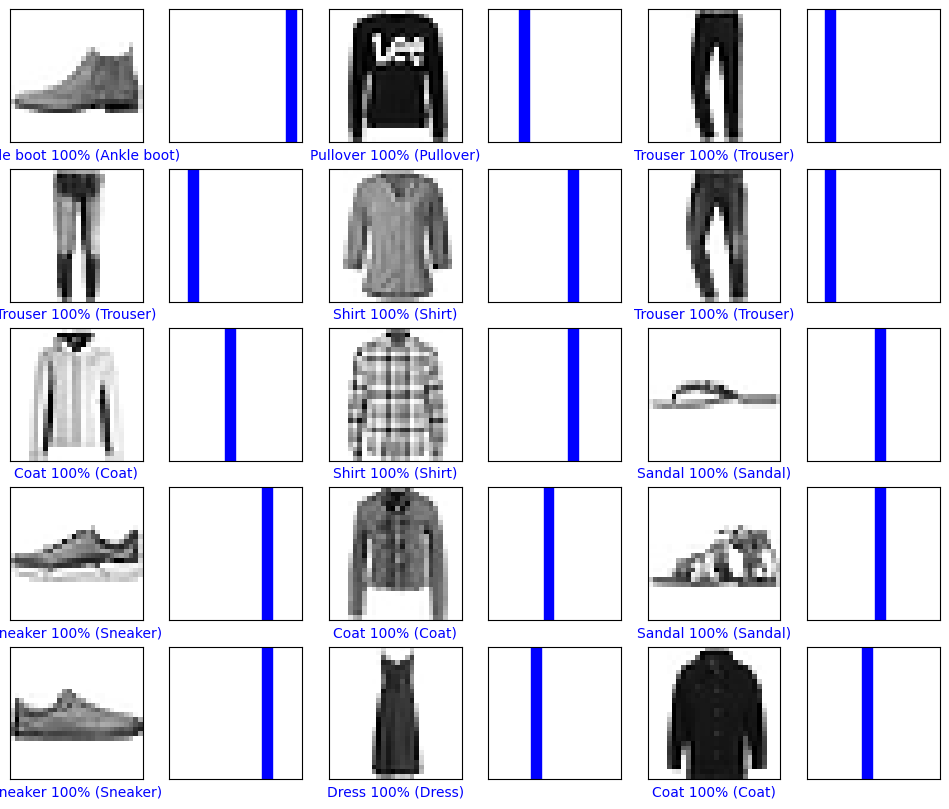

In [58]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    